# Car Price Prediction - Linear Regression

**Problem Statement:** <BR>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. <BR>
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.
<BR>
**Goal:**
<ul>
    <li>Identify variables which are significant in price prediction</li>
    <li>How accurately we can predict the price based on above identified independent variable </li>
</ul>

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_column', 100)

## Load Data

In [4]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.rename(columns={'car_ID' : 'carid', 'CarName': 'carname'}, inplace=True)
cars.set_index('carid', inplace=True)

In [6]:
cars.head()

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carid,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [8]:
cars.isnull().sum()

symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**No Missing Data in data set**

In [9]:
#Check for duplicate rows
cars[cars.duplicated()]

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carid,,,,,,,,,,,,,,,,,,,,,,,,,


In [10]:
#Check for duplicate rows by removing 'Price' column
cars[cars[cars.columns[:-1]].duplicated()]

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carid,,,,,,,,,,,,,,,,,,,,,,,,,


**There is no duplicate rows in data set**

In [11]:
cars['companyname'] = cars['carname'].apply(lambda x : x.split()[0])
cars.drop('carname', axis=1, inplace=True)

In [12]:
cars['companyname'].value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: companyname, dtype: int64

In [13]:
#Company name column data cleanup : few of the name are misspelled
compName = {'maxda' : 'mazda', 'Nissan' : 'nissan', 'porcshce' : 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen'}
cars.replace({'companyname' : compName}, inplace=True)
cars['companyname'].value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: companyname, dtype: int64

## Visualising Data

In [14]:
qutVar = cars.columns[cars.dtypes != 'object']
catVar = cars.columns[cars.dtypes == 'object']

### Quantitative Variable Univariate & Bivariate Analysis

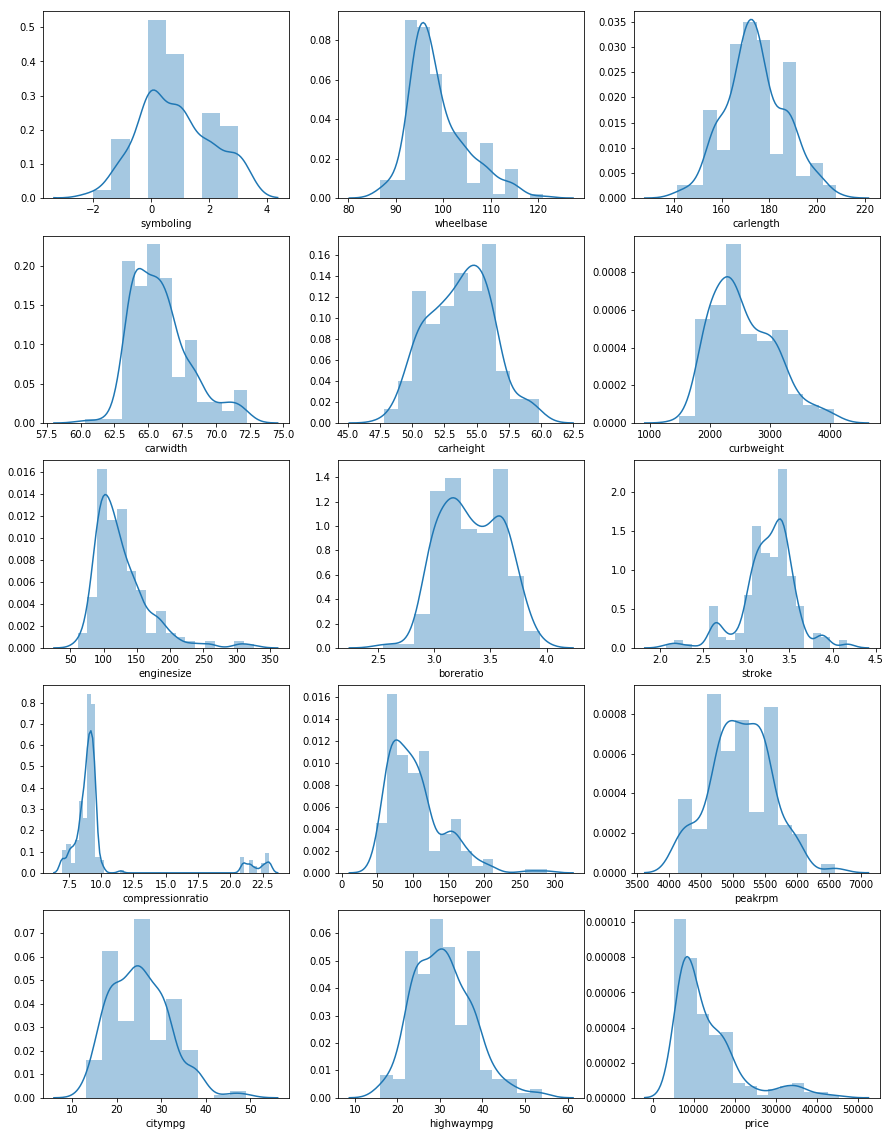

In [15]:
count = 1
plt.figure(figsize=(15,20))
for n in qutVar:
    plt.subplot(qutVar.size / 3, 3, count)
    sns.distplot(cars[n])
    count += 1

plt.show()

Few of the variable have clear outliers like:
<ul>
<li>**Engine Size:** Data skewed to right and sudden spike at **300**</li>
<li>**Bore Ration & Stroke:** These variables shows multimodal distribution, **Stroke** distribution have long left as well as right tail.</li>
<li>**Compression Ratio:** Right skewed distribution with outliners way away from other data point.</li>
<li>**Horse Power, City MPG & Price:** All these variables have some outliers on right-side of distribution</li>
</ul>

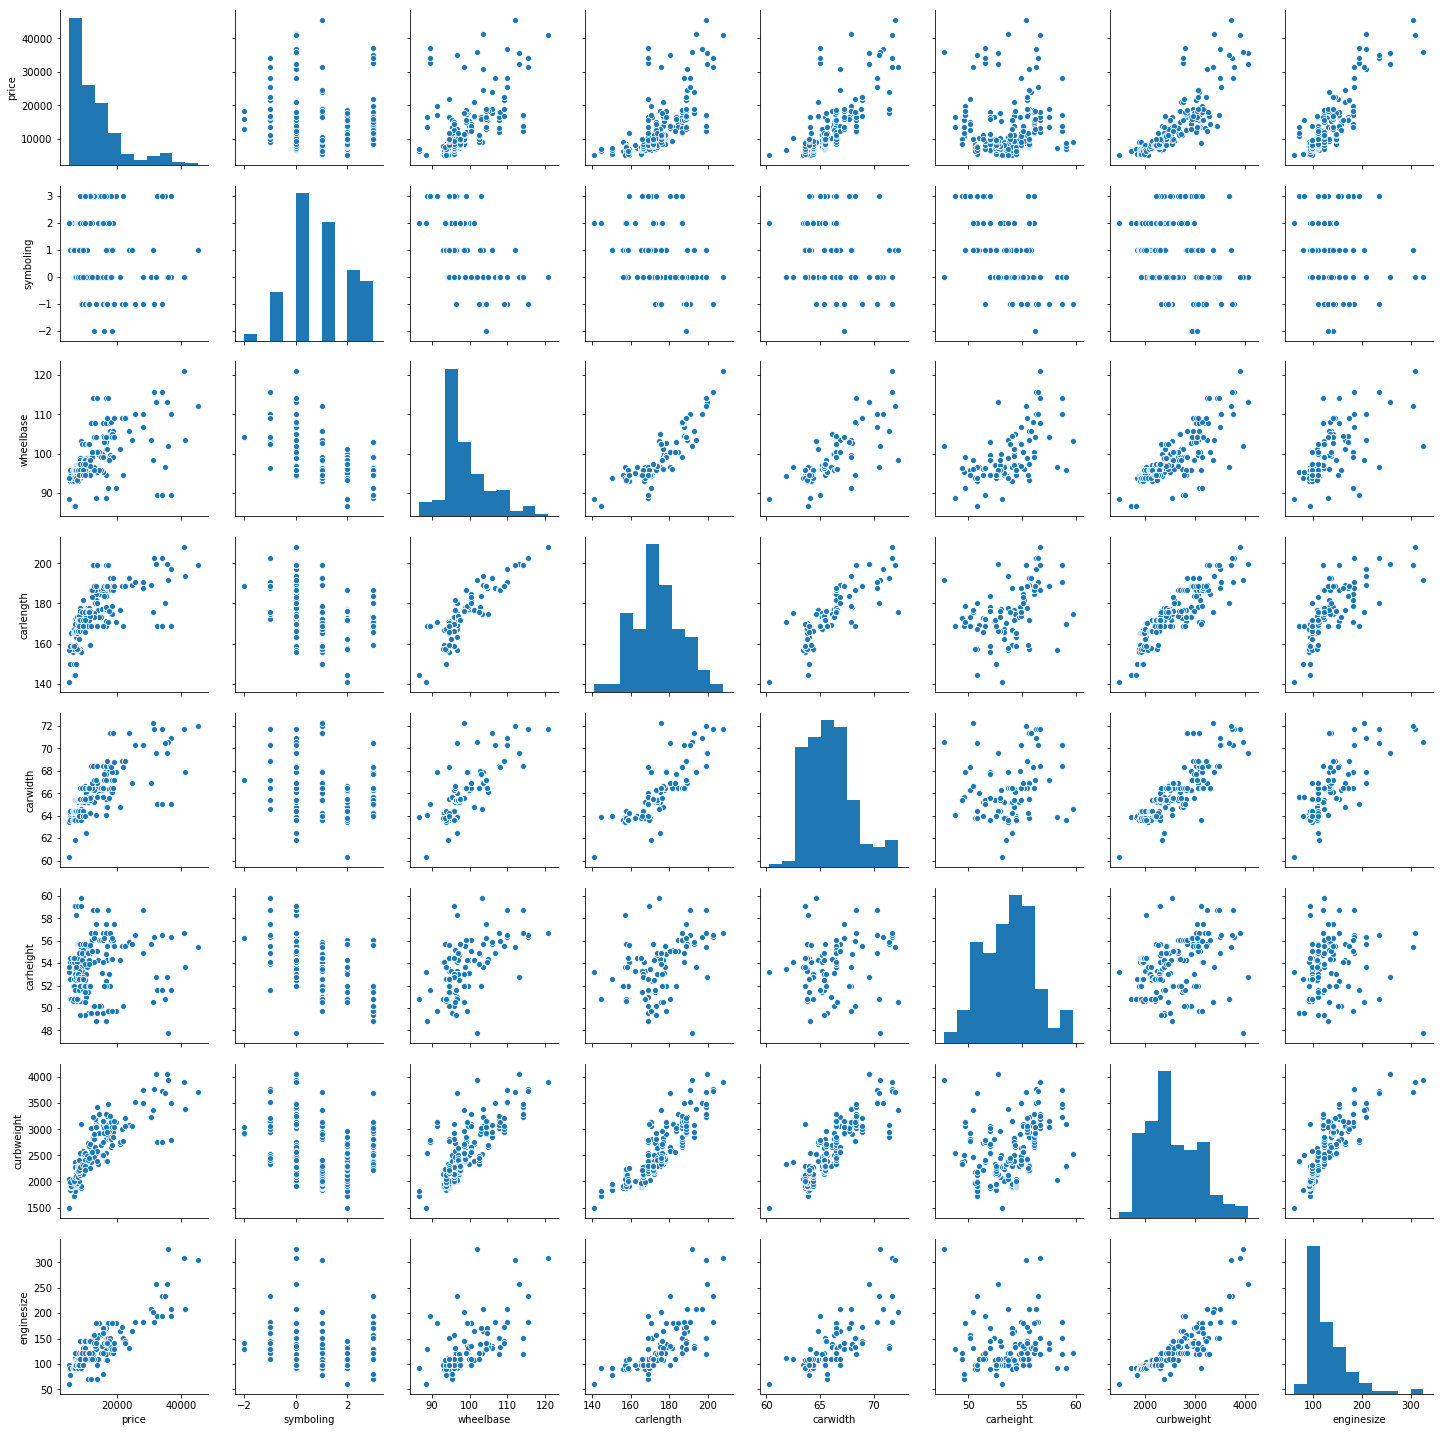

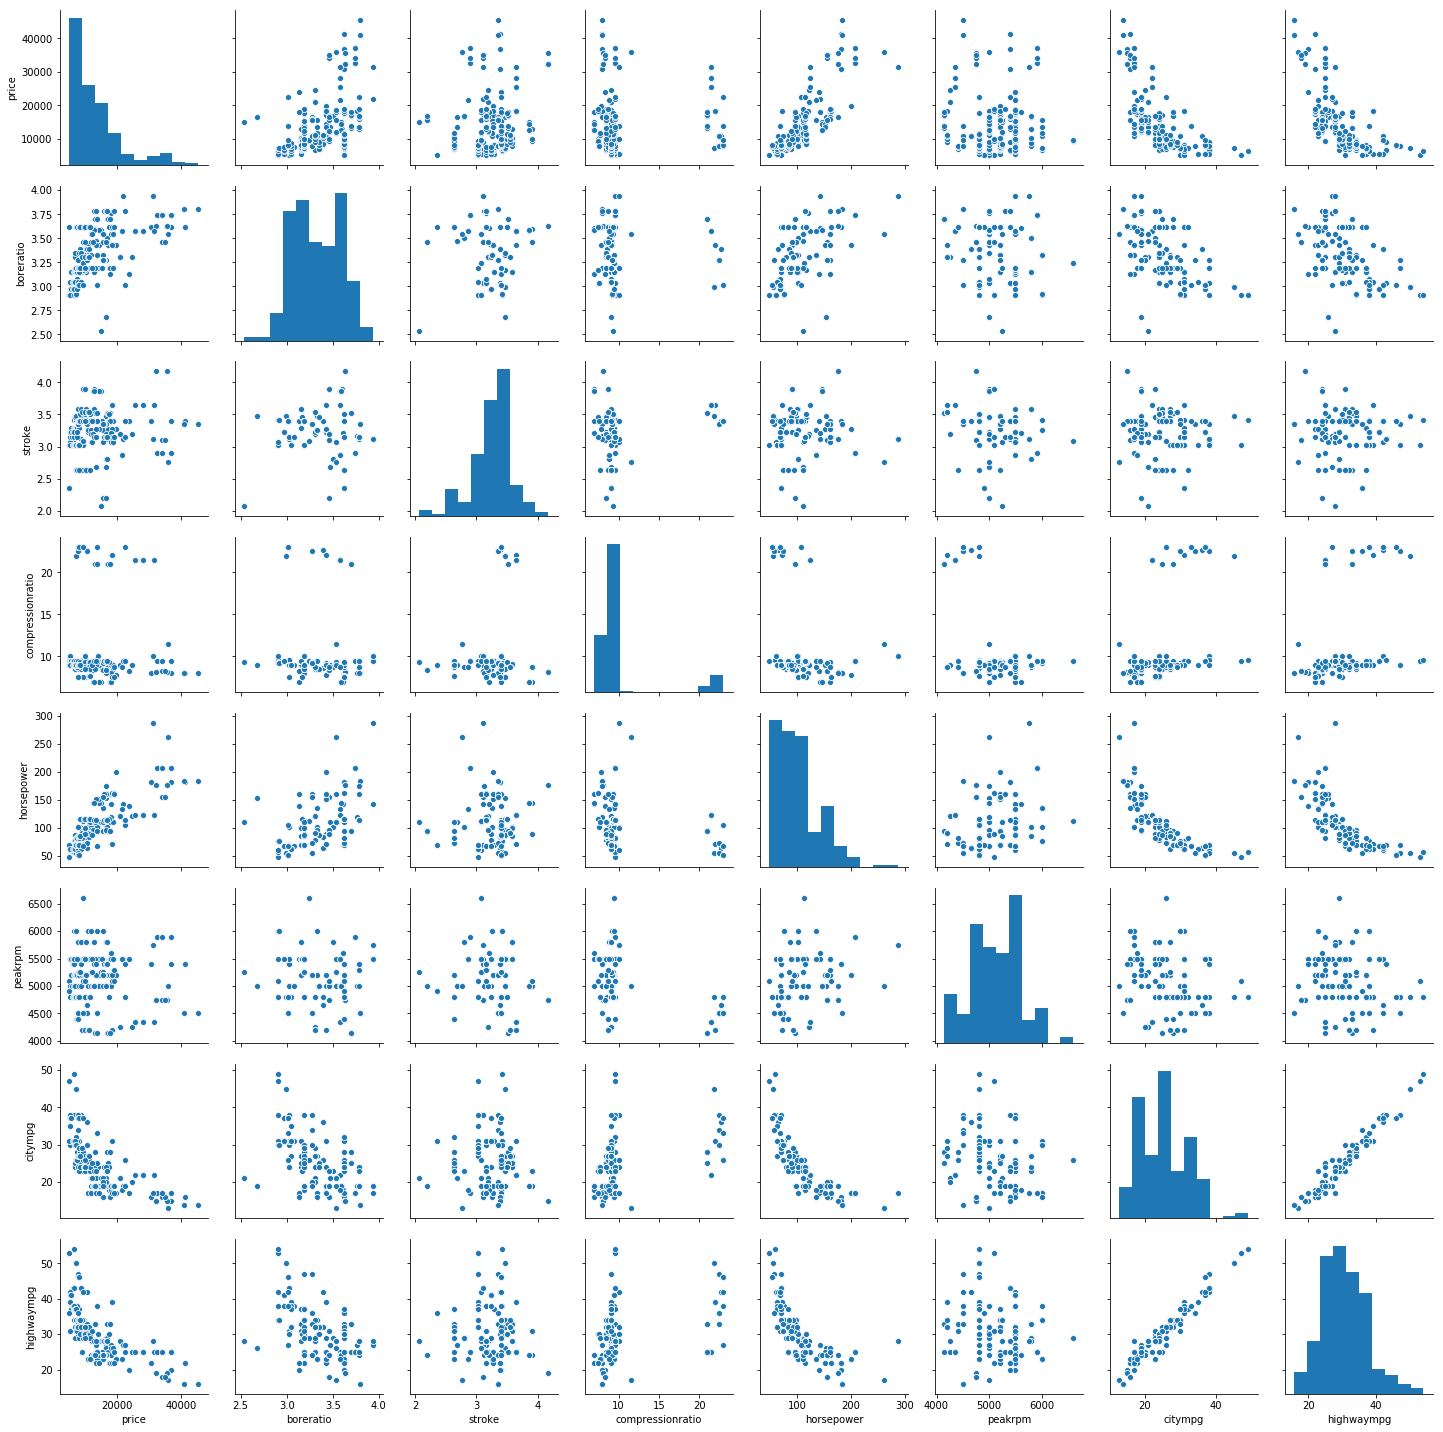

In [16]:
#Plot pairplot to check correlation
sns.pairplot(cars[['price','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize']])
sns.pairplot(cars[['price','boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg']])
plt.show()

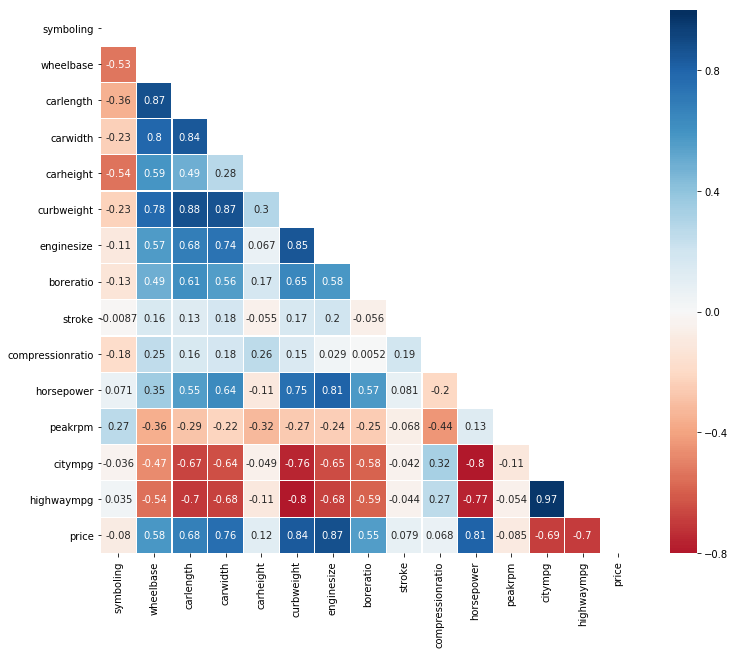

In [17]:
#Check correlation with heatmap
corr = cars.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='RdBu', annot=True,  mask=mask, center=0, linewidths= 0.1)
plt.show()

**Engine Size, Curb Weight, Car Width, Horse Power, Highway MPG** these variables are highly correlated to **Price** <BR>
Also **Wheel Base, Car Length, Bore Ratio, City MPG** these variables are correlated to **Price**
<BR>
Apart from correlation with **Price**, all these variables are correlated with each other which might cause **Multi-collinearity** issue.
<BR>
**Stroke, Symboling (Risk Rating), Car Height, Compression Ratio, Peak RPM** these variables not much impacting to **Price** (Will check this while model building).

### Qualitative Variable Univariate & Bivariate Analysis

In [18]:
#Generic function to plot Bar chart for distribution of categorical variables
#Also compare Same categorical variable against price using Box Plot

def PlotGraph(data, column, rows= 1, cols = 2, title='', figsize=(16,4), ticksRotation = 0, valueRotation = 0):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    #sortOrder = sorted(data1[column].unique(), key=sort_keys)
    plt1 = sns.barplot(data=data, x=column, y='price' ,ax=ax[0], estimator=lambda x: len(x) / len(data) * 100 )
    plt2 = sns.boxplot(data=data, x=column, y='price', ax=ax[1])

    if title == '':
        title = column + ' Distribution'

    fig.suptitle(title)
    ax[0].set_ylabel('Frequency (%)')
    ax[1].set_ylabel('Price')
        
    for i in range(0,len(ax)):
        plt.setp(ax[i].get_xticklabels(), rotation=ticksRotation)
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].annotate('%.1f' % height + "%",(p.get_x() + 0.2, height + 0.2 + (valueRotation / 30)  ), rotation=valueRotation) 
    
    plt.show()

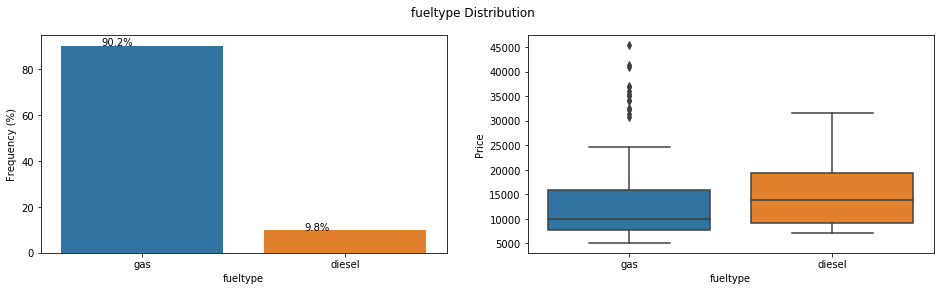

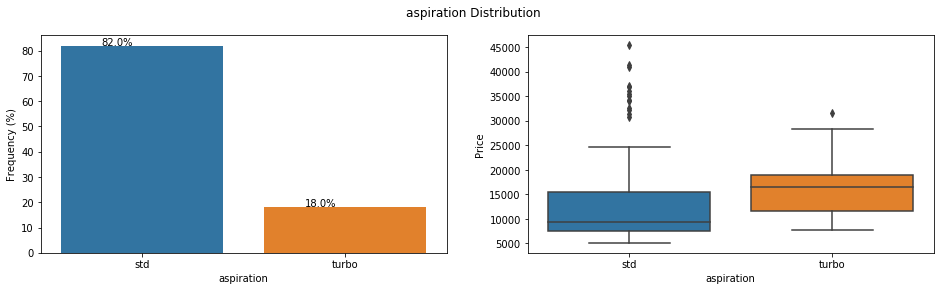

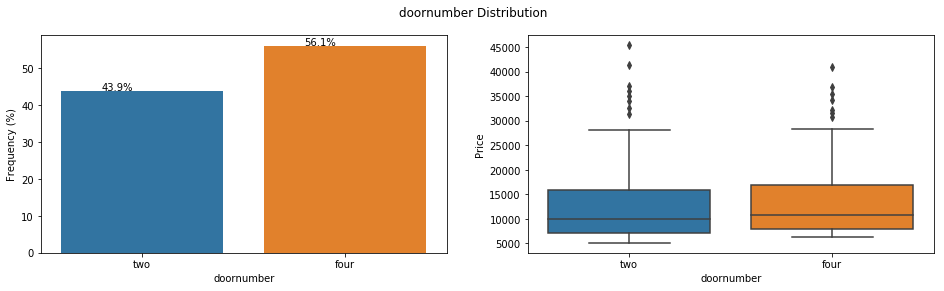

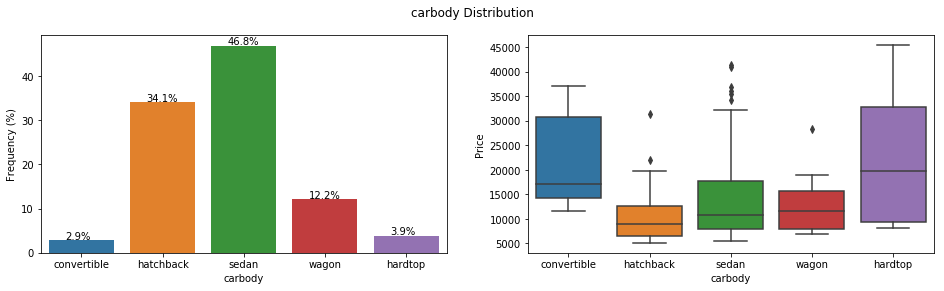

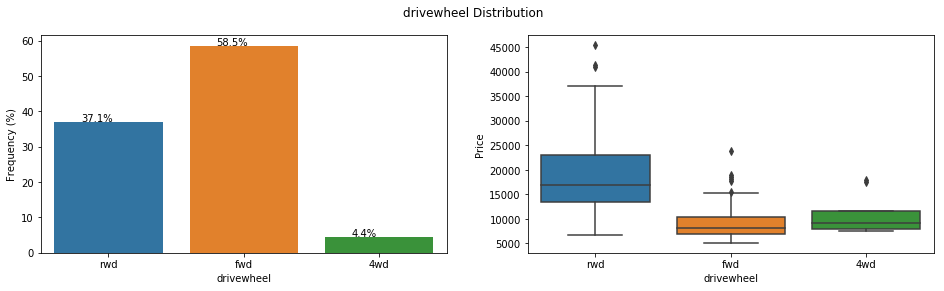

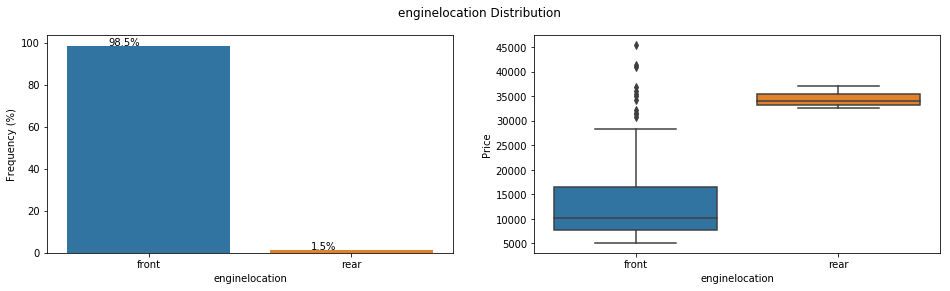

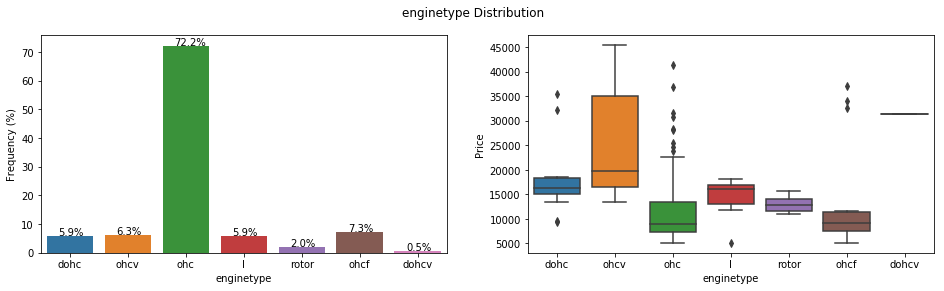

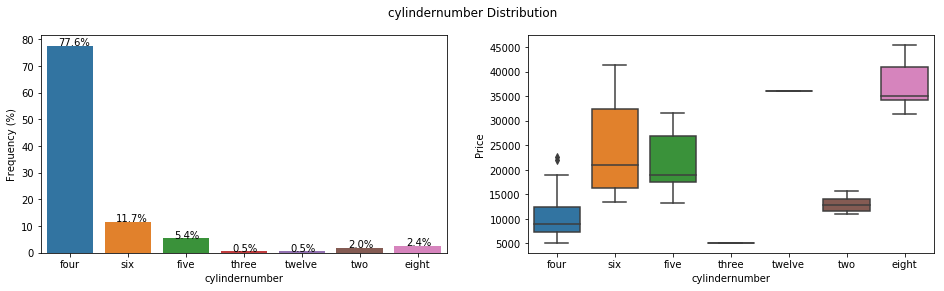

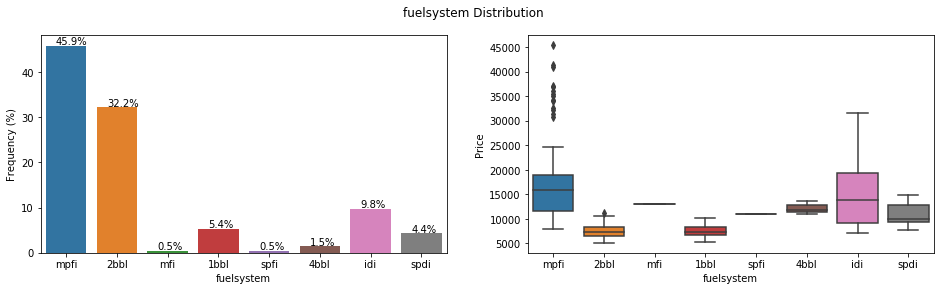

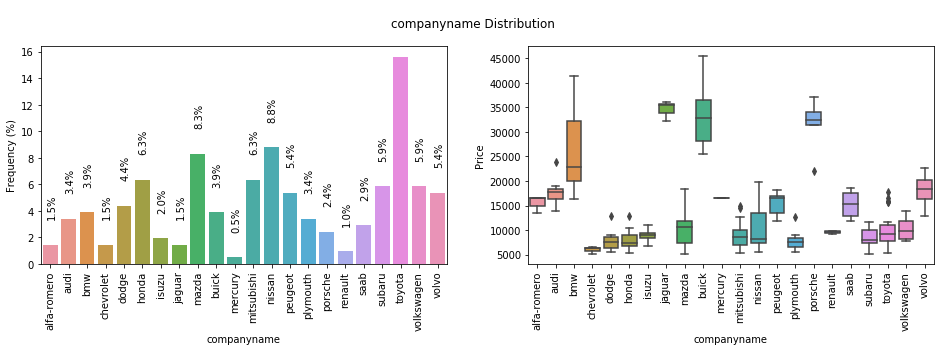

In [19]:
dummy = [PlotGraph(cars, col, ticksRotation=90, valueRotation=90) if col == 'companyname' else PlotGraph(cars, col) for col in catVar ]

<ul>
<li>**Fuel Type:** There is huge variation between Gas(90%) & Diesel (10%) type cars, Mean price of Diesel variable is slightly higher than gas cars </li>
<li>**Aspiration:** Frequency of Standard / Naturally aspirated engine is high as compare to Turbo, where as Turbocharged  engine are more costlier than standard one.</li>
<li>**Door Number:** Number of door in cars doesn't have much impact on price.</li>
<li>**Car Body:** **Hardtop** & **Convertible** cars tent to be more costlier than sedan, hatchback & wagon</li>
<li>**Drive Wheel:** **Rear wheel** drive clearly impact the car price.</li>
<li>**Engine Location:** Price of cars with **rear engine location** is very high as compare to front engine location.</li>
<li>**Engine Type:** Engine type also have good impact on Price variable, cars with **OHCV** engine are most costlier than other engine type.</li>
<li>**Cylinder Number:** Cars with more than **6 Cylinder** are attracting more price. </li>
<li>**Fuel System:** This does not have much impact on Price, **MPFI** & **IDI** fuel systems cars are slightly costlier.</li>
<li>**Company Name:** Brand name definitely have impact on cost of cars. **BMW, Jaguar, Buick, Porsche** cars are most costlier cars. </li>
</ul>
**Frequency of costlier cars are very less, which is obvious that everyone can not afford cars with high price**

## Data Prepration

### Numerical data

In [20]:
#Checking numerical data variable spread
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


For all numerical fields gap between **Mean** and **Median** are very less.<BR>
So, looks like there are no outliers in numerical data variables.

### Categorical Data

In [21]:
cars_dup = cars.copy()

In [22]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
carid,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


List of categorical variables which need some manipulation

### One Hot Encoding

In [23]:
print('************ Car Body ***********')
print(cars['carbody'].value_counts())
print()

print('************ Drive Wheel ***********')
print(cars['drivewheel'].value_counts())
print()

print('************ Engine Type ***********')
print(cars['enginetype'].value_counts())
print()

print('************ Fuel System ***********')
print(cars['fuelsystem'].value_counts())
print()

print('************ Company Name ***********')
print(cars['companyname'].value_counts())
print()

************ Car Body ***********
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

************ Drive Wheel ***********
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

************ Engine Type ***********
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

************ Fuel System ***********
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

************ Company Name ***********
toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury     

In [24]:
tempCars = pd.get_dummies(cars['carbody'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('carbody', axis=1, inplace=True)

In [25]:
tempCars = pd.get_dummies(cars['drivewheel'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('drivewheel', axis=1, inplace=True)

In [26]:
tempCars = pd.get_dummies(cars['enginetype'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('enginetype', axis=1, inplace=True)

In [27]:
tempCars = pd.get_dummies(cars['fuelsystem'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('fuelsystem', axis=1, inplace=True)

In [28]:
tempCars = pd.get_dummies(cars['companyname'], drop_first=True)
cars = pd.concat([cars, tempCars], axis=1)
cars.drop('companyname', axis=1, inplace=True)

### Binary Encoding

In [29]:
print('************ Symboling ***********')
print(cars['symboling'].value_counts())
print()

print('************ Fuel Type ***********')
print(cars['fueltype'].value_counts())
print()

print('************ Aspiration ***********')
print(cars['aspiration'].value_counts())
print()

print('************ Door Number ***********')
print(cars['doornumber'].value_counts())
print()

print('************ Engine Location ***********')
print(cars['enginelocation'].value_counts())
print()

************ Symboling ***********
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

************ Fuel Type ***********
gas       185
diesel     20
Name: fueltype, dtype: int64

************ Aspiration ***********
std      168
turbo     37
Name: aspiration, dtype: int64

************ Door Number ***********
four    115
two      90
Name: doornumber, dtype: int64

************ Engine Location ***********
front    202
rear       3
Name: enginelocation, dtype: int64



In [30]:
#Symboling column indicate insurance risk rating.
#+3 = Risk & -3 Is Safe
#So will convert this ordinal categorical variable to Descending order of risk(Risk Rating)
cars['symboling'] = abs(cars['symboling'] - 4)

In [31]:
#Fuel type is either Gas or Diesel : So we go for Binary Encoding
cars['fueltype_isgas'] = cars['fueltype'].apply(lambda x : 1 if x =='gas' else 0)
cars.drop('fueltype', axis=1, inplace=True)

In [32]:
#Aspiration is either Standard or Turbo : So we go for Binary Encoding
cars['aspiration_isstd'] = cars['aspiration'].apply(lambda x : 1 if x =='std' else 0)
cars.drop('aspiration', axis=1, inplace=True)

In [33]:
#Engine Location is either Front or Rear : So we go for Binary Encoding
cars['enginelocation_isfront'] = cars['enginelocation'].apply(lambda x : 1 if x =='front' else 0)
cars.drop('enginelocation', axis=1, inplace=True)

In [34]:
#Number of doors can have some numerical impact like 2 < 4 doors, so will convert to numerical var
#We have 2 possible values 2 or 4, so will also create one binary variable (will check performance at the time of model building)
cars['doornumber_isfour'] = cars['doornumber'].apply(lambda x: 1 if x == 'four' else 0)
cars['doornumber'] = cars['doornumber'].apply(lambda x: 4 if x == 'four' else 2)

In [35]:
#Cylinder number have numerical impact on car performance : More number of cylinder = More Power
cylinderNo ={'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'twelve':12}
cars.replace({'cylindernumber' : cylinderNo}, inplace=True)

In [36]:
print('************ Symboling ***********')
print(cars['symboling'].value_counts())
print()

print('************ Fuel Type - Is gas ***********')
print(cars['fueltype_isgas'].value_counts())
print()

print('************ Aspiration ***********')
print(cars['aspiration_isstd'].value_counts())
print()

print('************ Door Number ***********')
print(cars['doornumber'].value_counts())
print()

print('************ Engine Location - Is Front ***********')
print(cars['enginelocation_isfront'].value_counts())
print()

print('************ Cylinder Number ***********')
print(cars['cylindernumber'].value_counts())

************ Symboling ***********
4    67
3    54
2    32
1    27
5    22
6     3
Name: symboling, dtype: int64

************ Fuel Type - Is gas ***********
1    185
0     20
Name: fueltype_isgas, dtype: int64

************ Aspiration ***********
1    168
0     37
Name: aspiration_isstd, dtype: int64

************ Door Number ***********
4    115
2     90
Name: doornumber, dtype: int64

************ Engine Location - Is Front ***********
1    202
0      3
Name: enginelocation_isfront, dtype: int64

************ Cylinder Number ***********
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


## Model Building

In [37]:
#Load necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [38]:
cars_train, cars_test = train_test_split(cars, test_size = 0.2, random_state = 100)

In [39]:
y_train = cars_train.pop('price')
X_train = cars_train
X_train.shape

(164, 60)

### Feature Selection
Will use RFE (recursive Feature Elimination) technic to select most important features from **60** different available features.

In [40]:
#Create Linear Regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
#Use above create LR model as estimator to rfe 
rfe = RFE(lr, 10)
rfe = rfe.fit(X_train, y_train)
dfRFE = pd.DataFrame(data=np.array([X_train.columns,rfe.support_,rfe.ranking_, ]).T, columns=['Feature', 'Support', 'Rank'])

In [42]:
dfRFE[dfRFE['Support']]

,Feature,Support,Rank
16,hardtop,True,1
20,fwd,True,1
23,l,True,1
36,bmw,True,1
37,buick,True,1
42,jaguar,True,1
47,peugeot,True,1
49,porsche,True,1
51,saab,True,1
58,enginelocation_isfront,True,1


**Features discovered as part of EDA process** 

In [43]:
edaCols = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 
        'horsepower', 'citympg', 'highwaympg', 'aspiration_isstd', 'enginelocation_isfront', 'hardtop', 
        'hatchback', 'sedan', 'wagon', 'fwd', 'rwd']
len(edaCols)

18

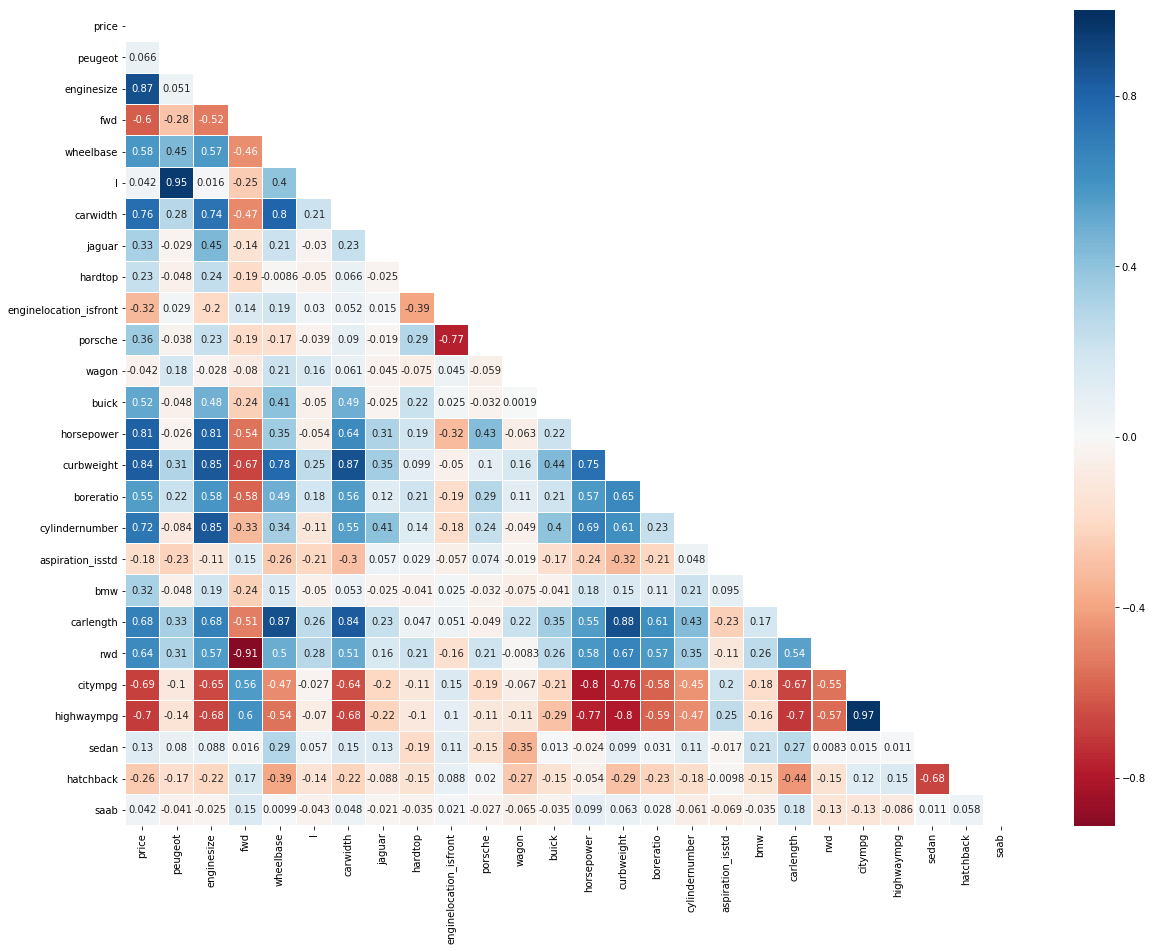

In [44]:
#Check correlation with EDA Features + RFE heatmap
cols = ['price'] + list(set(list(dfRFE[dfRFE['Support']]['Feature'].values) + edaCols))

corr = cars[cols].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='RdBu', annot=True,  mask=mask, center=0, linewidths= 0.1)
plt.show()

**Feature Selection based on Correlation Matrix After that Will go for VIF Score**
Will check which two independent features are highly corelated (will check > 85 %) and remove one of them based on correlation with dependent feature. 
<ul>
<li>**City MPG & Highway MPG (0.97) :** Both features are highly correlated (0.97). So we will remove one of them based on correlation with **Price**. Based on correlation with Price will remove **City MPG(0.69)** instead of highwaympg (0.7).</li>
<li>**Engine Size & Cylinder Number (0.85):** Will use above methods, Correlation is 0.85, Correlation with price Engine size = 0.87 & Cylinder Number = 0.72 , so will drop **Cylinder number**  </li>
<li>**Engine Size & Curb Weight (0.85):** Drop **Curb Weight** based on correlation </li>
<li>**Wheel Base & Car Length (0.87):** Drop **Wheel Base** based on correlation </li>
<li>**Peugeot & L (0.87):** Drop **L** based on correlation </li>
<li>**FWD & RWD (0.91):** Drop **FWD** based on correlation </li>
</ul>

In [45]:
removeCols = ['citympg', 'cylindernumber', 'curbweight', 'wheelbase', 'l', 'fwd']

** Generic Method to get LR Model & VIF score **

In [46]:
def GetLRModel(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return (lr, X_train_lm)

In [47]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i), 2) for i in range(df.shape[1])]
    vifScore = vifScore.sort_values(by = "VIF", ascending = False)
    return vifScore

**Build 1<sup>st</sup> Model Using Features discovered as a part for EDA Process & RFE**

In [48]:
cols.remove('price')
lr_1, train_lm_1 = GetLRModel(X_train[cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.17e-77
Time:                        23:44:49   Log-Likelihood:                -1453.0
No. Observations:                 164   AIC:                             2958.
Df Residuals:                     138   BIC:                             3039.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.12

R-squared & Adjusted R-squared values are very good (~95%), But there few insignificant variables also which are denoted by P-value.

**Build 2<sup>nd</sup> Model: Will remove manually identified collinear features**

In [49]:
tempCols = [c for c in cols if c not in removeCols]
lr_2, train_lm_2 = GetLRModel(X_train[tempCols], y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     121.7
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.05e-78
Time:                        23:44:49   Log-Likelihood:                -1467.0
No. Observations:                 164   AIC:                             2974.
Df Residuals:                     144   BIC:                             3036.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.76

Model 1 & Model 2 giving almost same R-Squared & Adjusted R-Squared. <BR>
But in model 2 we there are few insignificant variables as compare to model 1, so will use model 2 features and continue to enhance model.

**Let's Build 3<sup>rd</sup> Model: Use above feature list and remove insignificant features : highwaympg (P-value : 0.791) **

In [50]:
cols = tempCols
cols.remove('highwaympg')
lr_3, train_lm_3 = GetLRModel(X_train[cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           9.37e-80
Time:                        23:44:49   Log-Likelihood:                -1467.1
No. Observations:                 164   AIC:                             2972.
Df Residuals:                     145   BIC:                             3031.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.86

**Let's Build 4<sup>th</sup> Model: Use above feature list and remove insignificant features : carlength (P-value : 0.606) **

In [51]:
cols.remove('carlength')
lr_4, train_lm_4 = GetLRModel(X_train[cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           8.96e-81
Time:                        23:44:49   Log-Likelihood:                -1467.2
No. Observations:                 164   AIC:                             2970.
Df Residuals:                     146   BIC:                             3026.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6.01

R-squared & Adjusted R-squared value is **0.94 & 0.93** respectively.<BR>
Also **P-value** of all features also **less than 5%** as well as F-statistic is also high 137.
<BR>
Here **Condition Number** is very high which indicates strong multicollinearity.<BR>
Let's check VIF score of features used in Model 4

In [52]:
#Check VIF Score : For Multi-Collinearity
GetVIFScore(X_train[cols])

,Features,VIF
2,carwidth,566.35
10,boreratio,339.02
5,enginelocation_isfront,210.41
1,enginesize,87.05
9,horsepower,49.04
14,sedan,20.89
15,hatchback,15.45
11,aspiration_isstd,8.51
7,wagon,6.62
13,rwd,3.56


**Build 5<sup>th</sup> Model: Based on VIF score remove highly correlated feature : carwidth (VIF : 566.35)**

In [53]:
vifCols = cols.copy()
vifCols.remove('carwidth')
lr_5, train_lm_5 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     84.20
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.55e-65
Time:                        23:44:49   Log-Likelihood:                -1509.5
No. Observations:                 164   AIC:                             3053.
Df Residuals:                     147   BIC:                             3106.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.22

,Features,VIF
9,boreratio,179.55
4,enginelocation_isfront,152.82
1,enginesize,86.29
8,horsepower,48.13
13,sedan,19.59
14,hatchback,14.60
10,aspiration_isstd,8.15
6,wagon,6.38
12,rwd,3.41
5,porsche,2.77


**Will continue this process to handle Multi-Collinearity issue and removing insignificant feature variables**

In [54]:
#Model 6 : Remove 'boreratio'
vifCols.remove('boreratio')
lr_6, train_lm_6 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     89.84
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.44e-66
Time:                        23:44:49   Log-Likelihood:                -1510.0
No. Observations:                 164   AIC:                             3052.
Df Residuals:                     148   BIC:                             3102.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9622

,Features,VIF
1,enginesize,73.98
4,enginelocation_isfront,68.59
8,horsepower,48.03
12,sedan,19.23
13,hatchback,14.45
9,aspiration_isstd,8.13
6,wagon,6.21
11,rwd,3.38
5,porsche,2.11
2,jaguar,1.88


In [55]:
#Model 7 : Remove 'peugeot'
vifCols.remove('peugeot')
lr_7, train_lm_7 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     96.89
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.47e-67
Time:                        23:44:49   Log-Likelihood:                -1510.0
No. Observations:                 164   AIC:                             3050.
Df Residuals:                     149   BIC:                             3096.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9639

,Features,VIF
3,enginelocation_isfront,68.42
0,enginesize,68.27
7,horsepower,41.85
11,sedan,19.10
12,hatchback,14.42
8,aspiration_isstd,7.12
5,wagon,6.09
10,rwd,2.60
4,porsche,2.10
1,jaguar,1.82


In [56]:
#Model 8 : Remove 'wagon'
vifCols.remove('wagon')
lr_8, train_lm_8 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.57e-68
Time:                        23:44:50   Log-Likelihood:                -1510.5
No. Observations:                 164   AIC:                             3049.
Df Residuals:                     150   BIC:                             3092.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9090

,Features,VIF
0,enginesize,68.15
6,horsepower,41.83
3,enginelocation_isfront,35.01
7,aspiration_isstd,7.05
10,sedan,4.13
11,hatchback,3.34
9,rwd,2.55
4,porsche,2.05
1,jaguar,1.82
5,buick,1.60


In [57]:
#Model 9 : Remove 'sedan'
vifCols.remove('sedan')
lr_9, train_lm_9 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.27e-69
Time:                        23:44:50   Log-Likelihood:                -1510.5
No. Observations:                 164   AIC:                             3047.
Df Residuals:                     151   BIC:                             3087.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9087

,Features,VIF
0,enginesize,67.92
6,horsepower,41.57
3,enginelocation_isfront,29.36
7,aspiration_isstd,6.99
9,rwd,2.55
4,porsche,2.02
1,jaguar,1.81
10,hatchback,1.80
5,buick,1.59
8,bmw,1.30


In [58]:
#Model 10 : Remove 'enginesize'
vifCols.remove('enginesize')
lr_10, train_lm_10 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.08e-66
Time:                        23:44:50   Log-Likelihood:                -1519.4
No. Observations:                 164   AIC:                             3063.
Df Residuals:                     152   BIC:                             3100.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    1.2

,Features,VIF
2,enginelocation_isfront,22.15
5,horsepower,17.17
6,aspiration_isstd,6.73
8,rwd,2.53
3,porsche,2.02
9,hatchback,1.66
0,jaguar,1.35
7,bmw,1.26
4,buick,1.20
1,hardtop,1.14


In [59]:
#Model 11 : Remove 'enginelocation_isfront'
vifCols.remove('enginelocation_isfront')
lr_11, train_lm_11 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.97e-65
Time:                        23:44:50   Log-Likelihood:                -1525.2
No. Observations:                 164   AIC:                             3072.
Df Residuals:                     153   BIC:                             3106.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3309.4890   1065.662  

,Features,VIF
4,horsepower,5.87
5,aspiration_isstd,3.46
7,rwd,2.46
8,hatchback,1.62
2,porsche,1.22
6,bmw,1.22
3,buick,1.20
0,jaguar,1.17
1,hardtop,1.13
9,saab,1.07


In [60]:
#Model 12 : Remove 'saab'
vifCols.remove('saab')
lr_12, train_lm_12 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.84e-66
Time:                        23:44:50   Log-Likelihood:                -1526.0
No. Observations:                 164   AIC:                             3072.
Df Residuals:                     154   BIC:                             3103.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3190.7667   1063.831  

,Features,VIF
4,horsepower,5.59
5,aspiration_isstd,3.43
7,rwd,2.41
8,hatchback,1.61
2,porsche,1.22
6,bmw,1.22
3,buick,1.20
0,jaguar,1.16
1,hardtop,1.13


In [61]:
#Model 13 : Remove 'hardtop'
vifCols.remove('hardtop')
lr_13, train_lm_13 = GetLRModel(X_train[vifCols], y_train)
GetVIFScore(X_train[vifCols])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           8.80e-67
Time:                        23:44:50   Log-Likelihood:                -1527.1
No. Observations:                 164   AIC:                             3072.
Df Residuals:                     155   BIC:                             3100.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3185.8979   1067.552  

,Features,VIF
3,horsepower,5.59
4,aspiration_isstd,3.39
6,rwd,2.37
7,hatchback,1.58
5,bmw,1.21
2,buick,1.19
1,porsche,1.18
0,jaguar,1.16


After resolving Multi-Collinearity issue model R-Squared and Adjusted R-Squared drop from **(~94%) to (~88%)**.<BR>
So **R-Squared ~88%** & **Adjusted R-Squared ~87%** with very high **F-Statistic value 139.5** is very good model also  

### Residual Analysis

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
#Will predict price using both the model
y_predict_4 = lr_4.predict(train_lm_4)
y_predict_13 = lr_13.predict(train_lm_13)

In [64]:
print('** Model : 4 ** ')
mse = mean_squared_error(y_train, y_predict_4)
r_squared = r2_score(y_train, y_predict_4)
print('Mean Squared Error :' ,mse)
print('R-Squared :',r_squared)

print()
print('** Model : 13 ** ')
mse = mean_squared_error(y_train, y_predict_13)
r_squared = r2_score(y_train, y_predict_13)
print('Mean Squared Error :' ,mse)
print('R-Squared :',r_squared)

** Model : 4 ** 
Mean Squared Error : 3454290.5616084803
R-Squared : 0.9412526183140729

** Model : 13 ** 
Mean Squared Error : 7172608.94640771
R-Squared : 0.8780148954052381


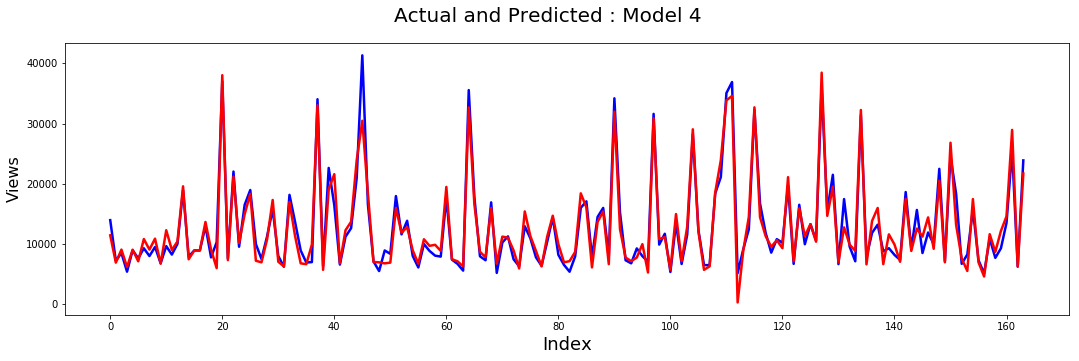

In [65]:
#Actual vs Predicted
c = [i for i in range(0,len(y_train),1)]
fig = plt.figure(figsize=(18,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict_4, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted : Model 4 ', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

plt.show()

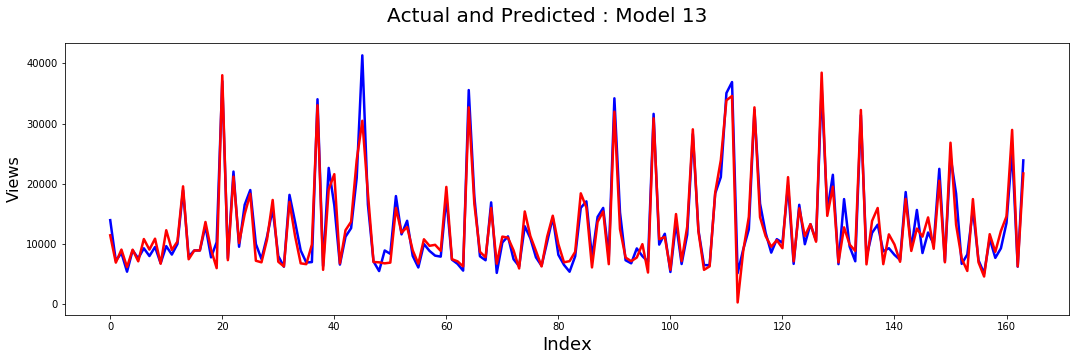

In [66]:
#Actual vs Predicted
c = [i for i in range(0,len(y_train),1)]
fig = plt.figure(figsize=(18,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict_4, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted : Model 13 ', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

plt.show()

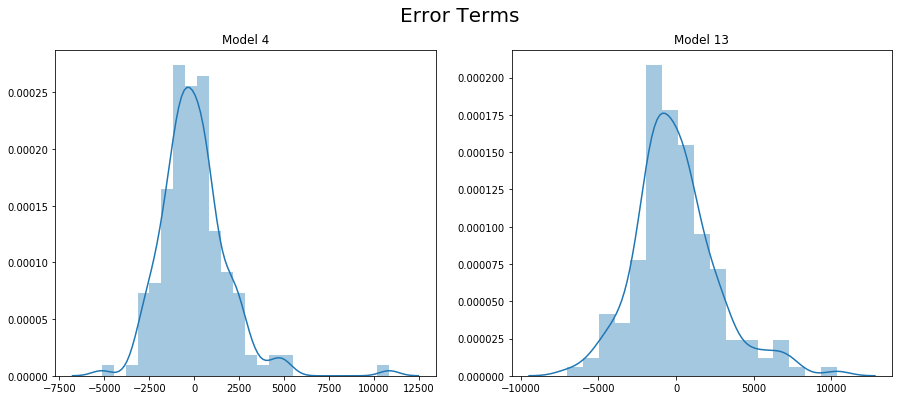

In [67]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Model 4')
sns.distplot((y_train - y_predict_4),  ax=ax1)

ax2=plt.subplot(1,2,2)
ax2.set_title('Model 13')
sns.distplot((y_train - y_predict_13), ax=ax2)

fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading       
plt.show()

In Model 4 Residual term having outliners on both the end, whereas on model 13 Residual term normally distributed.

### Making Predictions

In [68]:
#Predicting using Model 4 & Model 13
y_test = cars_test.pop('price')
X_test_4 = cars_test[train_lm_4.columns.drop('const')]
X_test_13 = cars_test[train_lm_13.columns.drop('const')]

In [69]:
X_test_lm_4 = sm.add_constant(X_test_4)
X_test_lm_13 = sm.add_constant(X_test_13)

In [70]:
y_test_predict_4 = lr_4.predict(X_test_lm_4)
y_test_predict_13 = lr_13.predict(X_test_lm_13)

In [71]:
print('** Model : 4 ** ')
mse = mean_squared_error(y_test, y_test_predict_4)
r_squared = r2_score(y_test, y_test_predict_4)
print('Mean Squared Error :' ,mse)
print('R-Squared :',r_squared)

print()
print('** Model : 13 ** ')
mse = mean_squared_error(y_test, y_test_predict_13)
r_squared = r2_score(y_test, y_test_predict_13)
print('Mean Squared Error :' ,mse)
print('R-Squared :',r_squared)

** Model : 4 ** 
Mean Squared Error : 8700917.134635862
R-Squared : 0.8870579575999149

** Model : 13 ** 
Mean Squared Error : 10421521.240899406
R-Squared : 0.8647236980136683


It proves that Model 4 is not stable on Test data (or overfitted on train data) as its R-Squared drop from 94 % to 88 %. <BR>
Whereas R-Squared of Model 13 is stable on train and test data

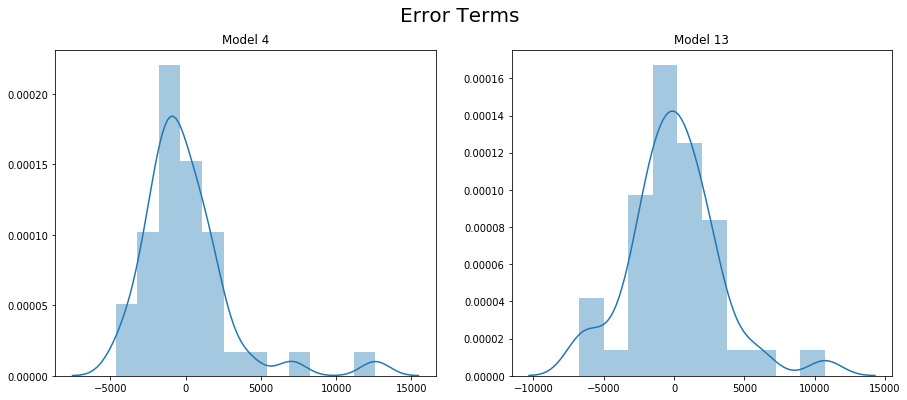

In [72]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Model 4')
sns.distplot((y_test - y_test_predict_4),  ax=ax1)

ax2=plt.subplot(1,2,2)
ax2.set_title('Model 13')
sns.distplot((y_test - y_test_predict_13), ax=ax2)

fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading     
plt.show()

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predict_13)

0.8647236980136683

In [74]:
print('Main Features: ' + ', '.join(X_test_lm_13.columns))
print('Other Features: ' + ', '.join(X_test_lm_4.columns))

Main Features: const, jaguar, porsche, buick, horsepower, aspiration_isstd, bmw, rwd, hatchback
Other Features: const, peugeot, enginesize, carwidth, jaguar, hardtop, enginelocation_isfront, porsche, wagon, buick, horsepower, boreratio, aspiration_isstd, bmw, rwd, sedan, hatchback, saab


So we can conclude few of the features such as **Car Company / Brand Name, Car Body Type, Engine Horse Power & Aspiration** actually impact car price.<BR>
Apart from that few other dominating features are **Engine Size and Engine Location (Front / Rear) **.